## 2. Text retrieval with PyPDF2

`PyPDF2` is a Python library specifically tailored for extracting information from PDF documents. It simplifies the task of retrieving text and metadata. Now, we'll explore PyPDF2 for PDF text extraction. We'll begin with extracting text from a single PDF.

In [1]:
from PyPDF2 import PdfReader
import os
import re
import glob
import pandas as pd

In [3]:
pdf_path = '../data/Part_I/Congressional_Bills/pdf_docs/PL0668820231218.pdf'
reader   = PdfReader( pdf_path )
n_pages  = len( reader.pages )

try:
    extracted_text = [ reader.pages[ i ].extract_text() for i in range( n_pages ) ]
    print( 'Text successfully extracted' )

except:
    extracted_text = []
    print( 'Text not found' )

Text successfully extracted


Once extracted, we can access to number of pages

In [4]:
print( f'Number of pages: { n_pages }' )

Number of pages: 13


We can access to the extracted text as well. We can start showing text for the first two pages.

In [5]:
extracted_text[ : 2 ]

['CeNGOIESO OE LA PIE PuaLicg \nM&o TRIALIITE GOCumENIA,RIO \n18 DIC. 2023 \nR 15:351,LS lo\n:IV; 9 \nCONI9RESO\n4 REPÚBLICA Proyecto de ley N° .. 1/2 Ci2 3 " \nNIEVES ESMERALDA LIMACHI QUISPE \nCongresista de la República \n\'Decenio de ta Igualdad de Oportunidades para Mueres y Hombres" \n\'Ano de la unidad, la paz y el desarrollo\'" \nProyecto de Ley que establece \nparámetros para el saneamiento de la \npropiedad de los posesionarios de \nvivienda construidas con recursos del \nFONAVI. \nLos Congresistas de la República que suscriben, a iniciativa de la Congresista NIEVES \nESMERALDA LIMACHI QUISPE, miembro del Grupo Parlamentario "Cambio \nDemocrático - Juntos Por el Perú", en ejercicio del derecho de iniciativa legislativa que \nle confieren el artículo 107\' de la Constitución Política del Perú, y de conformidad con los \nartículos 22° inciso c), 75° y 76° del Reglamento del Congreso de la República, proponen \nel siguiente Proyecto de Ley: \nFÓRMULA LEGAL \nEl Congreso de la Re

We can combine text for all the pages

In [6]:
combined_text = '\n'.join( extracted_text )
combined_text[ : 5000 ]

'CeNGOIESO OE LA PIE PuaLicg \nM&o TRIALIITE GOCumENIA,RIO \n18 DIC. 2023 \nR 15:351,LS lo\n:IV; 9 \nCONI9RESO\n4 REPÚBLICA Proyecto de ley N° .. 1/2 Ci2 3 " \nNIEVES ESMERALDA LIMACHI QUISPE \nCongresista de la República \n\'Decenio de ta Igualdad de Oportunidades para Mueres y Hombres" \n\'Ano de la unidad, la paz y el desarrollo\'" \nProyecto de Ley que establece \nparámetros para el saneamiento de la \npropiedad de los posesionarios de \nvivienda construidas con recursos del \nFONAVI. \nLos Congresistas de la República que suscriben, a iniciativa de la Congresista NIEVES \nESMERALDA LIMACHI QUISPE, miembro del Grupo Parlamentario "Cambio \nDemocrático - Juntos Por el Perú", en ejercicio del derecho de iniciativa legislativa que \nle confieren el artículo 107\' de la Constitución Política del Perú, y de conformidad con los \nartículos 22° inciso c), 75° y 76° del Reglamento del Congreso de la República, proponen \nel siguiente Proyecto de Ley: \nFÓRMULA LEGAL \nEl Congreso de la Rep

We can access to specific sections. Here, we'll attempt to retrieve information from Article 1.

In [8]:
start_pattern = r'Art(í|i)culo 1\. Objeto de la Ley'
end_pattern   = r'Art(í|i)culo 2.'

start_match   = re.search( start_pattern, combined_text, re.IGNORECASE )
end_match     = re.search( end_pattern, combined_text[ start_match.end(): ], re.IGNORECASE )

end_index     = start_match.end() + end_match.start()
article_text  = combined_text[ start_match.end(): end_index ].strip()

article_text

'La presente ley tiene por objeto, modificar los artículos 8, 9,10 y 11, de la Ley 31173, Ley \nque garantiza el cumplimiento de la ley 29625, ley de devolución de dinero del Fonavi a los \ntrabajadores que contribuyeron al mismo, priorizando a la población vulnerable, como \nconsecuencia de la pandemia de la COVID-19; a fin de establecer los parámetros para el \nsaneamiento de la propiedad de los posesionarios de vivienda construidas con recursos del \nFONAVI.'

Now we'll access to two sections: "Fórmula Legal" and "Artículo 1". 

In [9]:
def extract_two_sections( combined_text, start_pattern, end_pattern ):

    start_match    = re.search( start_pattern, combined_text, re.IGNORECASE )
    end_match      = re.search( end_pattern, combined_text[ start_match.end(): ], re.IGNORECASE )
    
    end_index      = start_match.end() + end_match.start()
    extracted_text = combined_text[ start_match.end(): end_index ].strip()

    return extracted_text

In [12]:
patterns = [
    { 'start': r'Art(í|i)culo 1\. Objeto de la Ley', 'end': r'Art(í|i)culo 2.', 'section': 'Artículo 1' },
    { 'start': r'F(ó|o)rmula legal', 'end': r'Art(í|i)culo 1\.', 'section': 'Formula legal' }
]

In [13]:
results = []

for pattern in patterns:
    
    section_text = extract_two_sections( combined_text, pattern[ 'start' ], pattern[ 'end' ] )
    results.append( {'Sección': pattern[ 'section' ], 'Texto': section_text } )

df = pd.DataFrame( results )
df

,Sección,Texto
0,Artículo 1,"La presente ley tiene por objeto, modificar lo..."
1,Formula legal,El Congreso de la República \nHa dado la Ley s...


We can redefine this function to work with multiple pdf files

In [14]:
def extract_section_text( pdf_files, start_pattern, end_pattern ):
    
    '''
    Extracts specific sections of text from a list of PDF files.

    Parameters:
        - pdf_files (list)    : A list of paths to the PDF files.
        - start_pattern (str) : The regex pattern marking the beginning 
                                of the desired text section.
        - end_pattern (str)   : The regex pattern marking the end of the 
                                desired text section.

    Returns:
        - dict: A dictionary where each key is a PDF file path and the 
                value is the extracted text or an error message if the 
                pattern is not found.
    '''
    results = {}
    
    for pdf_file in pdf_files:
        
        reader        = PdfReader( pdf_file )
        full_text     = [ page.extract_text() for page in reader.pages ]
        combined_text = '\n'.join( full_text )

        start_match = re.search( start_pattern, combined_text, re.IGNORECASE )
        if start_match:
            end_match = re.search( end_pattern, combined_text[start_match.end(): ], re.IGNORECASE )
            
            if end_match:
                end_index           = start_match.end() + end_match.start()
                results[ pdf_file ] = combined_text[start_match.end() : end_index ].strip()
            
            else:
                results[ pdf_file ] = 'End pattern not found.'
        
        else:
            results[ pdf_file ] = 'Start pattern not found.'

    return results

We define start and end patterns

In [23]:
patterns = [
    { 'start': r'Art(í|i)culo 1\.', 'end': r'Art(í|i)culo 2', 'section': 'Artículo 1' },
    { 'start': r'(F(ó|o)rmula legal|dado la siguiente ley)', 'end': r'Art(í|i)culo 1\.', 'section': 'Fórmula legal' }
]

We finally apply the function:

In [24]:
pdf_files = glob.glob( '../data/Part_I/Congressional_Bills/pdf_docs/*.pdf' )

In [36]:
df = pd.DataFrame()

for pattern in patterns:
    extracted_texts = extract_section_text( pdf_files, pattern[ 'start' ], pattern[ 'end' ] )
    temp_df         = pd.DataFrame.from_dict( extracted_texts, orient = 'index', columns = [ pattern[ 'section' ] ] )
    df = pd.concat( [ df, temp_df ], axis = 1 )

df = df.reset_index()
df['Proyecto de ley'] = df['index'].str.extract( r'\\(PL\d+).pdf$' )
df = df.drop( [ 'index' ], axis = 1 )
df.to_excel( '../data/Part_I/Congressional_Bills/pdf_docs/bills.xlsx', index = False )
df

,Artículo 1,Fórmula legal,Proyecto de ley
0,Objeto y finalidad de la ley \nLa presente ley...,: \nLEY QUE MODIFICA EL DECRETO LEGISLATIVO N....,PL0668720231215
1,Objeto de la Ley \nLa presente ley tiene por o...,El Congreso de la República \nHa dado la Ley s...,PL0668820231218
2,- Objeto \nLa presente ley tiene por objeto pr...,Start pattern not found.,PL0668920231218
3,Creación de la Universidad Nacional Autónoma d...,El Congreso de la República \nHa dado la sigui...,PL0669020231218
4,— Finalidad y objeto de la Ley \nLa presente l...,LEY DE EXPULSIÓN DE EXTRANJEROS DETENIDOS EN F...,PL0669120231218


# 3. Tables retrieval with Camelot

Camelot is a Python library for extracting tables from PDF files. It converts tables in PDFs into structured formats like pandas DataFrames, streamlining data analysis and processing tasks.

### How Camelot Works

Camelot reads PDF files and extracts tables from the pages you specify. The extraction process can be customized using different parameters and methods, allowing you to tailor the extraction to the specific layout of your PDF.

### Main Function

  - `read_pdf(filepath, pages='all', flavor='lattice', **kwargs)`

### Main Parameters

  - `filepath`: Path to the PDF file.
  - `pages`: Pages to extract tables from ('all', '1', '1,2,3', '1-3', etc.).
  - `flavor`: Extraction method ('lattice' or 'stream').

### Flavors

1. **Lattice**: Used when tables are enclosed within distinct borders. It's ideal for extracting data from grid-like tables.
   - Relies on visible lines of the table.
   - More accurate when the tables have clear demarcation lines.

2. **Stream**: Best for tables without clear borders or where lines between cells aren't visible.
   - Relies on the position of the text to determine cell boundaries.
   - Useful when dealing with whitespace-separated columns.

### Other Parameters

- `strip_text`: Remove unwanted characters.
- `line_scale`: Increase if tables have thin lines (Lattice only).
- `shift_text`: Adjust when text is not aligned (Stream only).

## 3.1. Lattice falvor

First, let's extract tables using `lattice` flavor.

In [37]:
import camelot

In [39]:
reader = camelot.read_pdf( '../data/Part_II/camelot/Lista-de-egresados-2021-1.pdf', pages = '1', flavor = 'lattice' )

In [40]:
table = reader[ 0 ].df
table.head( 5 )

,0,1,2
0,Código\nNombre\nCarrera,,
1,19901171,"OJEDA TUMPAY, CAROLINA MARGOT",PSICOLOGIA-PREGRADO ADULTO
2,20120377,"FALCON CUYUTUPA, ANDREA ELIANA",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
3,20130966,"BEDRIÑANA MENDOZA, JOSE ANDRES",GESTIÓN-PREGRADO EN EEGG O FORMACIÓN GENERAL
4,20131294,"UGAZ QUIÑONES, AARON ALEXIS",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL


Let's format this table

In [41]:
new_headers   = table.iloc[ 0, 0 ].split( '\n' )
table.columns = new_headers
table         = table.drop( 0 )
table         = table.reset_index( drop = True )
table.head( 5 )

,Código,Nombre,Carrera
0,19901171,"OJEDA TUMPAY, CAROLINA MARGOT",PSICOLOGIA-PREGRADO ADULTO
1,20120377,"FALCON CUYUTUPA, ANDREA ELIANA",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
2,20130966,"BEDRIÑANA MENDOZA, JOSE ANDRES",GESTIÓN-PREGRADO EN EEGG O FORMACIÓN GENERAL
3,20131294,"UGAZ QUIÑONES, AARON ALEXIS",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
4,20132069,"FARJE CARDENAS, DAVID ALEJANDRO",PSICOLOGIA-PREGRADO EN EEGG O FORMACIÓN GENERAL


We can read tables for all the PDF document

In [45]:
def lattice_function( file, n_pages ):

    reader = camelot.read_pdf( file, pages = n_pages , flavor = 'lattice' )
    # table  = reader[ 0 ].df
    df_list = []
    
    for i in range( len( reader ) ):
        df = reader[ i ].df
        df_list.append( df )
    
    df_concat         = pd.concat( df_list, ignore_index = True )
    new_headers       = df_concat.iloc[ 0, 0 ].split( '\n' )
    df_concat.columns = new_headers
    df_concat         = df_concat.drop( 0 )
    df_concat         = df_concat.reset_index( drop = True )
    df_concat

    return df_concat

In [50]:
file    = '../data/Part_II/camelot/Lista-de-egresados-2021-1.pdf'
n_pages = 'all'

df = lattice_function( file, n_pages )
df.to_excel( '../data/Part_II/camelot/egresados_2021_1.xlsx', index = False )

In [51]:
df

,Código,Nombre,Carrera
0,19901171,"OJEDA TUMPAY, CAROLINA MARGOT",PSICOLOGIA-PREGRADO ADULTO
1,20120377,"FALCON CUYUTUPA, ANDREA ELIANA",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
2,20130966,"BEDRIÑANA MENDOZA, JOSE ANDRES",GESTIÓN-PREGRADO EN EEGG O FORMACIÓN GENERAL
3,20131294,"UGAZ QUIÑONES, AARON ALEXIS",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
4,20132069,"FARJE CARDENAS, DAVID ALEJANDRO",PSICOLOGIA-PREGRADO EN EEGG O FORMACIÓN GENERAL
...,...,...,...
789,20200447,"CHAVEZ MALAGA, DANIELA NAHIL",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
790,20200675,"IBERICO LOPEZ, MARIA FERNANDA",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
791,20200697,"DELGADO SECLEN, MARIA JOSE ALEXA",DERECHO-PREGRADO EN EEGG O FORMACIÓN GENERAL
792,20201008,"CHAHUD MARTINEZ, SAID GUILLERMO",RR.INT.-PREGRADO EN EEGG O FORMACIÓN GENERAL


## 3.2. Stream flavor

First, let's extract tables using `stream` flavor.

In [52]:
reader = camelot.read_pdf( '../data/Part_II/camelot/pspl0320.pdf', pages = '8', flavor = 'stream' )
len( reader )

1

We can plot the specific text that `Stream` method identifies.

C:\Users\dell\AppData\Local\Temp\ipykernel_26832\3203909404.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot( reader[ 0 ], kind = 'text' ).show()


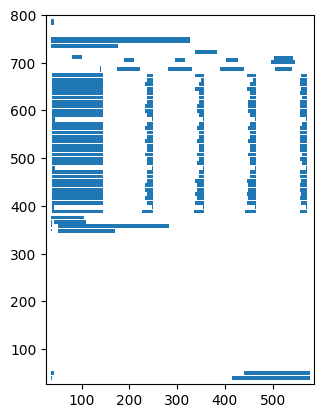

In [53]:
camelot.plot( reader[ 0 ], kind = 'text' ).show()

Now we take a look at the extracted table. We notice that we need to fix its structure.

In [54]:
table = reader[ 0 ].df
table.head( 5 )

,0,1,2,3,4,5,6,7,8
0,State,,,,,,,Percent of,
1,,2018,,2019,,2020 1,,,
2,,,,,,,,previous year,
3,,"(1,000 acres)",,"(1,000 acres)",,"(1,000 acres)",,(percent),
4,Alabama 2 ............................,,40,,(NA),,(NA),,(X)


In [55]:
for year in range( 2018, 2021 ):
    
    col_indices          = [ ( year - 2018 ) * 2 + 1, ( year - 2018 ) * 2 + 2 ]
    table[ str( year ) ] = table[ col_indices[ 0 ] ].astype( str ) + table[ col_indices[ 1 ] ].astype( str )
    
cols_to_drop = list( range( 1, 9 ) )
table        = table.drop( columns = cols_to_drop )

table            = table.rename( columns = { 0: 'State', 7: 'Percent of previous year' } )
table            = table.drop( [ 0, 1, 2 ], axis = 0 )
table[ 'State' ] = table[ 'State' ].str.replace( r'\.{2,}', '', regex = True )\
                                   .str.replace(r'\d+', '', regex=True)\
                                   .str.strip()
table.head( 5 )

,State,2018,2019,2020
3,,"(1,000 acres)","(1,000 acres)","(1,000 acres)"
4,Alabama,40,(NA),(NA)
5,Arkansas,10,5,8
6,California,110,75,75
7,Colorado,95,(NA),(NA)


We can use this base code to define a function that can be applied to other tables in this PDF file.

In [56]:
def stream_function( file, n_page ):

    '''
    Objective: 
    
    - Extracts and processes table data from a specified page of a PDF file using the 'stream' 
      method from Camelot library.

    Inputs:
    
    - file: A string representing the file path to the PDF document.
    - n_page: A string or integer representing the page number to extract the table from.

    Output:
    
    - A pandas DataFrame containing the processed table data. The DataFrame has specific columns
      for each year (2018, 2019, 2020) and 'Percent of previous year' (if applicable), 
      along with a cleaned 'State' column.

    Notes: 
    
    - This function assumes a specific table structure and may need adjustments for 
      different table formats.
    - This function works for tables that share format as tables present in pages 6, 8, 9, and
      so on.
    '''

    reader = camelot.read_pdf( file, pages = n_page , flavor = 'stream' )        
    table  = reader[ 0 ].df

    for year in range( 2018, 2021 ):
        
        col_indices          = [ ( year - 2018 ) * 2 + 1, ( year - 2018 ) * 2 + 2 ]
        table[ str( year ) ] = table[ col_indices[ 0 ] ].astype( str ) + table[ col_indices[ 1 ] ].astype( str )

    if len( table.columns ) == 12:
        
        table[ 'Percent of previous year' ] = table[ 7 ].astype( str ) + table[ 8 ].astype( str )
        final_col = 9
        
    else:
        final_col = 7
        
    cols_to_drop = list( range( 1, final_col ) )
    table        = table.drop( columns = cols_to_drop )
    
    table            = table.rename( columns = { 0: 'State', 7: 'Percent of previous year' } )
    table            = table.drop( [ 0, 1, 2 ], axis = 0 )
    table[ 'State' ] = table[ 'State' ].str.replace( r'\.{2,}', '', regex = True )\
                                       .str.replace(r'\d+', '', regex=True)\
                                       .str.strip()
    
    table            = table.reset_index( drop = True )
    
    column_name      = 'Percent of previous year'
    column           = table.pop( column_name )
    table.insert( 1, column_name, column )

    return table

In [69]:
file    = '../data/Part_II/camelot/pspl0320.pdf'
n_page  = '6'

df = stream_function( file, n_page )
df.to_excel( f'../data/Part_II/camelot/extracted/pspl0320_p{ n_page }.xlsx' )
df.head ( 7 )

,State,Percent of previous year,2018,2019,2020
0,,(percent),"(1,000 acres)","(1,000 acres)","(1,000 acres)"
1,Alabama,116,255,320,370
2,Arizona,111,80,90,100
3,Arkansas,104,660,770,800
4,California,96,430,460,440
5,Colorado,106,"1,460","1,550","1,650"
6,Connecticut,100,23,23,23
